In [13]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import sklearn
import sklearn.datasets as skds
import sklearn.model_selection as skms
import sklearn.preprocessing as skpp

In [2]:
boston = skds.load_boston()

In [9]:
X, y = boston.data.astype(np.float32), boston.target.astype(np.float32)

In [18]:
if y.ndim == 1:
    y = y.reshape(y.shape[0], -1)

In [19]:
X_train, X_test, y_train, y_test = skms.train_test_split(X, y, test_size=0.2)

In [20]:
x_scaler = skpp.StandardScaler()
X_train = x_scaler.fit_transform(X_train)
X_test = x_scaler.transform(X_test)

In [21]:
X_train[0]

array([ 0.22963963, -0.49866718,  1.0515829 , -0.27288842,  0.560786  ,
        0.25524145,  0.9272917 , -0.75561124,  1.7764623 ,  1.6264619 ,
        0.8243509 ,  0.42147732,  1.0138465 ], dtype=float32)

In [22]:
num_outputs = y_train.shape[1]
num_inputs = X_train.shape[1]

In [23]:
x_tensor = tf.placeholder(dtype=tf.float32, shape=[None, num_inputs], name='x')
y_tensor = tf.placeholder(dtype=tf.float32, shape=[None, num_outputs], name='y')

In [24]:
w = tf.Variable(tf.zeros([num_inputs, num_outputs]), dtype=tf.float32, name='w')
b = tf.Variable(tf.zeros([num_outputs]), dtype=tf.float32, name='b')

In [25]:
model = tf.matmul(x_tensor, w) + b

In [26]:
loss = tf.reduce_mean(tf.square(model - y_tensor))
mse = tf.reduce_mean(tf.square(model - y_tensor))
y_mean = tf.reduce_mean(y_tensor)

In [28]:
total_error = tf.reduce_sum(tf.square(y_tensor - y_mean))
unexplained_error = tf.reduce_sum(tf.square(y_tensor - model))
rs = 1 - tf.div(unexplained_error, total_error)

Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


In [45]:
lr = 1e-3
optimizer = tf.train.GradientDescentOptimizer(lr).minimize(loss)

In [46]:
num_epochs = 3000
loss_epochs = []
mse_epochs = []
rs_epochs = []

In [47]:
mse_score = 0
rs_score = 0

In [48]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for epoch in range(num_epochs):
        feed_dict = {x_tensor: X_train, y_tensor: y_train}
        loss_val, _ = sess.run([loss, optimizer], feed_dict=feed_dict)
        loss_epochs.append(loss_val)

        feed_dict = {x_tensor: X_test, y_tensor: y_test}
        mse_score, rs_score = sess.run([mse, rs], feed_dict=feed_dict)
        mse_epochs.append(mse_score)
        rs_epochs.append(rs_score)

    print("For test data: MSE = {0:.8f}, R2 = {1:.8f}".format(mse_score, rs_score))

For test data: MSE = 28.79956627, R2 = 0.61819941


In [49]:
import matplotlib.pyplot as plt

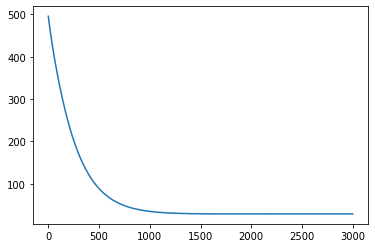

In [58]:
plt.plot(np.arange(len(mse_epochs)), np.asarray(mse_epochs))

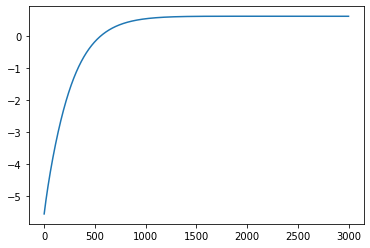

In [57]:
plt.plot( np.arange(len(rs_epochs)), np.asarray(rs_epochs))

In [54]:
rs_epochs[-1]

0.6181994